# Assignment - Decision Tree-2

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharingsharing

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables..

#### Answer:

In [1]:
cd

C:\Users\USER


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

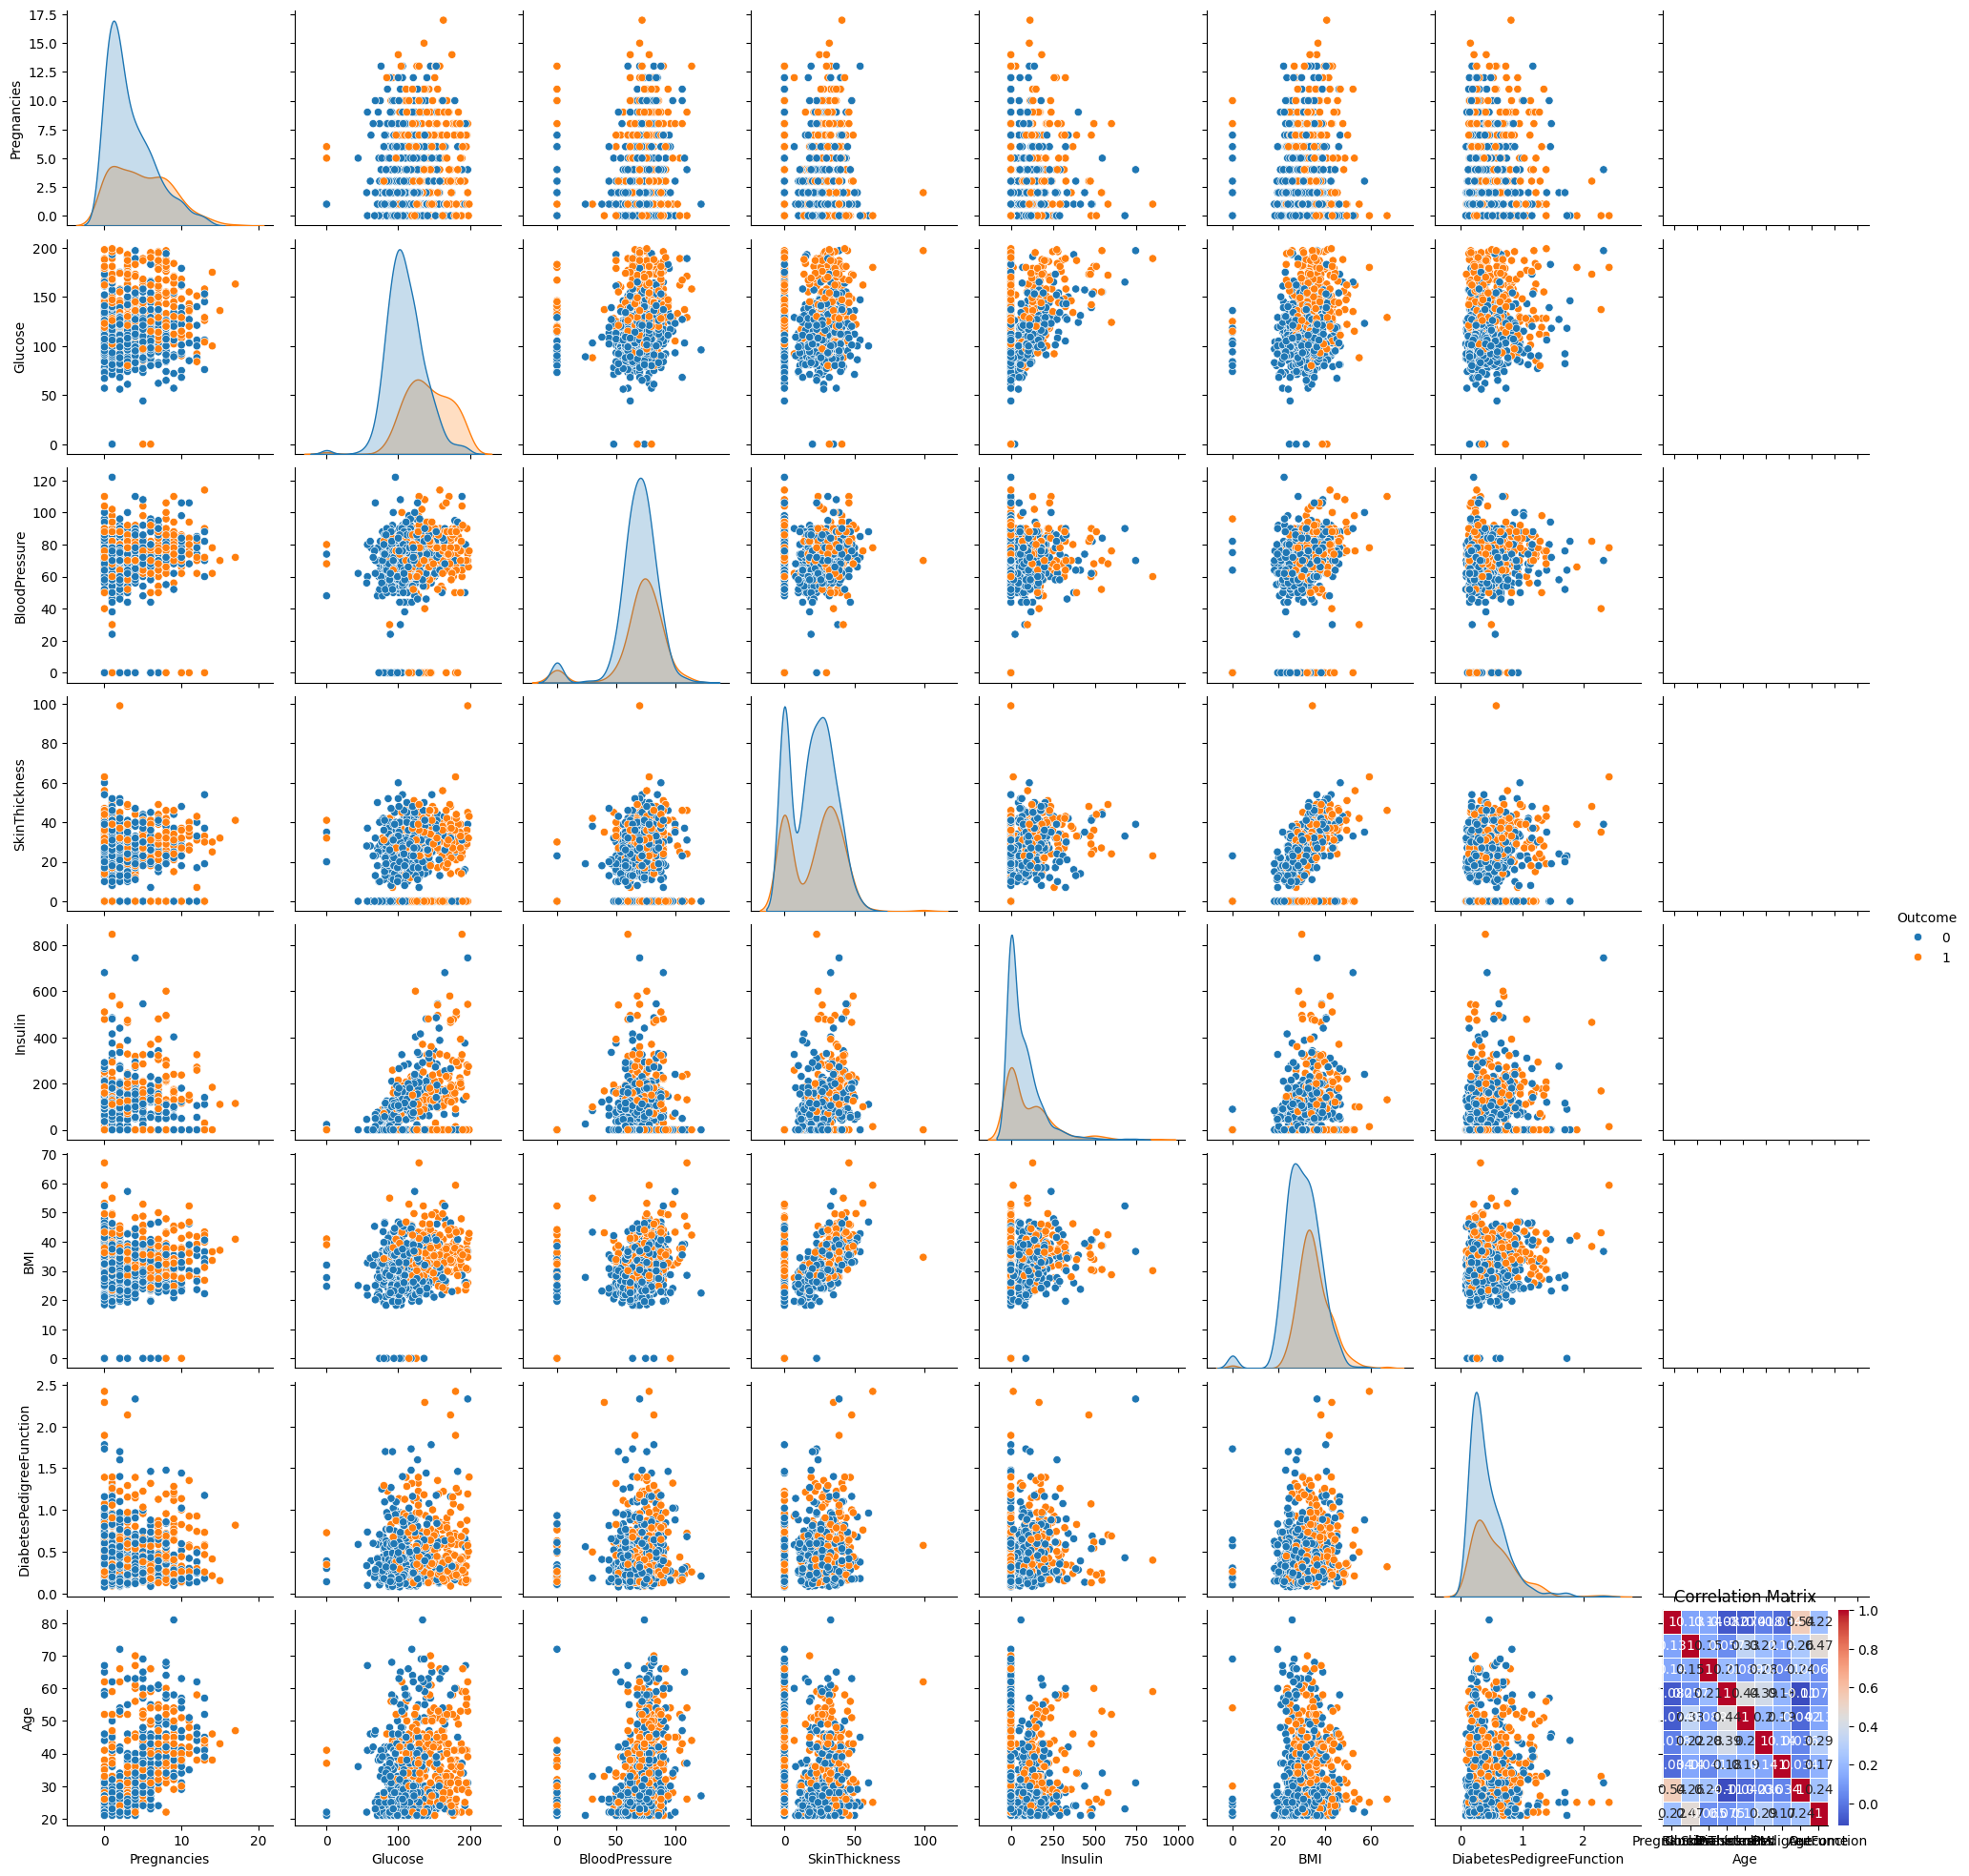

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "diabetes.csv"
diabetes_data = pd.read_csv(file_path)

print(diabetes_data.head())  
print(diabetes_data.info()) 
print(diabetes_data.describe())  

sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')

correlation_matrix = diabetes_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary..

#### Answer:

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "diabetes.csv"
df = pd.read_csv(url)

# Handling Missing Values
df.fillna(df.mean(), inplace=True)  # Example: Impute missing values with mean

# Handling Outliers
# Example: Remove outliers using the Interquartile Range (IQR) method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Transforming Categorical Variables (if necessary)
# Example: Use pd.get_dummies() to convert categorical variables to dummy/indicator variables

# Train-Test Split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the preprocessed data
print(X_train.head())
print(y_train.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
722            1      149             68             29      127  29.3   
213            0      140             65             26      130  42.6   
343            5      122             86              0        0  34.7   
306           10      161             68             23      132  25.5   
304            3      150             76              0        0  21.0   

     DiabetesPedigreeFunction  Age  
722                     0.349   42  
213                     0.431   24  
343                     0.290   33  
306                     0.326   47  
304                     0.207   37  
722    1
213    1
343    0
306    1
304    0
Name: Outcome, dtype: int64


#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

#### Answer:

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the features (X) and the target variable (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Set a random seed for reproducibility
random_seed = 42

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (511, 8) (511,)
Test set shape: (128, 8) (128,)


#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting..

#### Answer:

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Step 1: Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Cross-Validation and Hyperparameter Tuning
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Print mean cross-validation accuracy
print(f'Mean Cross-Validation Accuracy: {mean_cv_accuracy}')

Mean Cross-Validation Accuracy: 0.6711593375214162


#### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results...

#### Answer:

Accuracy: 0.7578
Precision: 0.5610
Recall: 0.6389
F1 Score: 0.5974
Confusion Matrix:
[[74 18]
 [13 23]]


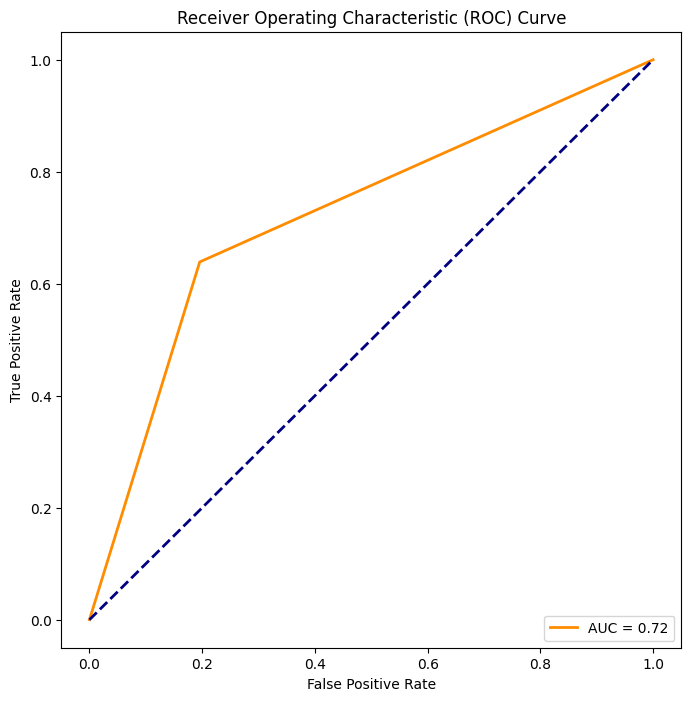

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate performance using metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

#### Answer:


1. **Root Node:**
   - The first node in the tree, usually based on the variable that provides the best separation of the data into diabetic and non-diabetic groups.

2. **Nodes and Splits:**
   - Each subsequent node represents a decision based on a specific variable and a threshold value.
   - For example, a split could be based on the glucose level being greater than a certain value.

3. **Branches:**
   - For each decision (split), there are two branches, one for each possible outcome of the decision.

4. **Leaves:**
   - Terminal nodes or leaves represent the final classification (diabetic or non-diabetic).

5. **Important Variables and Thresholds:**
   - The importance of variables is usually reflected in the splits that occur higher up in the tree. The variable and its threshold at these points are critical for making predictions.
   - In your case, variables like Glucose, BMI, and Age might be important predictors.

6. **Patterns and Trends:**
   - Observe the splits to understand the patterns. For instance, if high glucose levels are a strong predictor, it suggests that high glucose is associated with diabetes.

7. **Domain Knowledge:**
   - Consider domain knowledge to make sense of the patterns. For instance, it's known that high glucose levels are a risk factor for diabetes.

8. **Tree Pruning:**
   - Consider if the tree needs pruning to prevent overfitting. Pruning involves removing branches tha build a robust and reliable diabetes prediction model.

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks

#### Answer:

1. **Test on New Data:**
   - Use a separate set of data not used during the training phase to assess the model's performance on unseen data. This helps evaluate generalization.

2. **Cross-Validation:**
   - Implement techniques like k-fold cross-validation to assess the model's stability and reliability.

3. **Sensitivity Analysis:**
   - Modify individual data points and observe how the model reacts. This helps assess sensitivity to changes in the dataset.

4. **Scenario Testing:**
   - Introduce hypothetical scenarios or changes to the environment to evaluate the model's robustness.

5. **Outliers and Anomalies:**
   - Test the model's response to outliers and anomalies in the data to understand its behavior in extreme cases.

6. **Performance Metrics:**
   - Utilize metrics such as accuracy, precision, recall, and F1-score to quantify the model's performance.

7. **Update and Retrain:**
   - If the model shows signs of instability or poor performance, consider updating and retraining it with more recent data.

By combining domain knowledge, rigorous testing, and thoughtful interpretation of the decision tree, you can build a robust and reliable diabetes prediction model.